Este archivo se hizo con la finalidad de hacer un breve análisis exploratorio de los datos una vez fueron desanidados y convertidos a archivos `.parquet`

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import ast
from matplotlib.ticker import FuncFormatter
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
movies = pd.read_parquet('movies_dataset_cleaned.parquet', engine='pyarrow')
movies.head(10)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,...,genre_id,genre_name,production_company_name,production_company_id,production_iso_3166_1,production_country,language_iso_639_1,language,release_year,return
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Released,None,...,"[16, 35, 10751]","['Animation', 'Comedy', 'Family']",['Pixar Animation Studios'],[3],US,United States of America,en,English,1995,12.451801
1,65000000,8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Released,Roll the dice and unleash the excitement!,...,"[12, 14, 10751]","['Adventure', 'Fantasy', 'Family']","['TriStar Pictures', 'Teitler Film', 'Intersco...","[559, 2550, 10201]",US,United States of America,en,English,1995,4.043035
2,0,15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Released,Still Yelling. Still Fighting. Still Ready for...,...,"[10749, 35]","['Romance', 'Comedy']","['Warner Bros.', 'Lancaster Gate']","[6194, 19464]",US,United States of America,en,English,1995,0.000000
3,16000000,31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,1995-12-22,81452156.0,127.0,Released,Friends are the people who let you be yourself...,...,"[35, 18, 10749]","['Comedy', 'Drama', 'Romance']",['Twentieth Century Fox Film Corporation'],[306],US,United States of America,en,English,1995,5.090760
4,0,11862,en,Just when George Banks has recovered from his ...,8.387519,1995-02-10,76578911.0,106.0,Released,Just When His World Is Back To Normal... He's ...,...,[35],['Comedy'],"['Sandollar Productions', 'Touchstone Pictures']","[5842, 9195]",US,United States of America,en,English,1995,0.000000
5,60000000,949,en,"Obsessive master thief, Neil McCauley leads a ...",17.924927,1995-12-15,187436818.0,170.0,Released,A Los Angeles Crime Saga,...,"[28, 80, 18, 53]","['Action', 'Crime', 'Drama', 'Thriller']","['Regency Enterprises', 'Forward Pass', 'Warne...","[508, 675, 6194]",US,United States of America,en,English,1995,3.123947
6,58000000,11860,en,An ugly duckling having undergone a remarkable...,6.677277,1995-12-15,0.0,127.0,Released,You are cordially invited to the most surprisi...,...,"[35, 10749]","['Comedy', 'Romance']","['Paramount Pictures', 'Scott Rudin Production...","[4, 258, 932, 5842, 14941, 55873, 58079]",DE,Germany,fr,Français,1995,0.000000
7,0,45325,en,"A mischievous young boy, Tom Sawyer, witnesses...",2.561161,1995-12-22,0.0,97.0,Released,The Original Bad Boys.,...,"[28, 12, 18, 10751]","['Action', 'Adventure', 'Drama', 'Family']",['Walt Disney Pictures'],[2],US,United States of America,en,English,1995,0.000000
8,35000000,9091,en,International action superstar Jean Claude Van...,5.231580,1995-12-22,64350171.0,106.0,Released,Terror goes into overtime.,...,"[28, 12, 53]","['Action', 'Adventure', 'Thriller']","['Universal Pictures', 'Imperial Entertainment...","[33, 21437, 23770]",US,United States of America,en,English,1995,1.838576
9,58000000,710,en,James Bond must unmask the mysterious head of ...,14.686036,1995-11-16,352194034.0,130.0,Released,No limits. No fears. No substitutes.,...,"[12, 28, 53]","['Adventure', 'Action', 'Thriller']","['United Artists', 'Eon Productions']","[60, 7576]",GB,United Kingdom,en,English,1995,6.072311


In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45359 entries, 0 to 45358
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   budget                   45359 non-null  int64  
 1   id                       45359 non-null  int64  
 2   original_language        45348 non-null  object 
 3   overview                 44418 non-null  object 
 4   popularity               45359 non-null  float64
 5   release_date             45359 non-null  object 
 6   revenue                  45359 non-null  float64
 7   runtime                  45113 non-null  float64
 8   status                   45279 non-null  object 
 9   tagline                  20393 non-null  object 
 10  title                    45359 non-null  object 
 11  vote_average             45359 non-null  float64
 12  vote_count               45359 non-null  float64
 13  id.1                     4487 non-null   float64
 14  name                  

Aquí puede verse un resumen tabular de las distribuciones de los datos.

In [13]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,id.1,release_year,return
count,4.535900e+04,45359.000000,45359.000000,4.535900e+04,45113.000000,45359.000000,45359.000000,4487.000000,45359.000000,4.535900e+04
mean,4.234169e+06,108026.198836,2.926491,1.123427e+07,94.179726,5.624176,110.121431,184079.138400,1991.883132,6.602902e+02
std,1.744294e+07,112177.776233,6.010366,6.440166e+07,38.345705,1.915294,491.831125,141645.795283,24.052875,7.470729e+04
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,10.000000,1874.000000,0.000000e+00
25%,0.000000e+00,26386.500000,0.388855,0.000000e+00,85.000000,5.000000,3.000000,86025.500000,1978.000000,0.000000e+00
50%,0.000000e+00,59852.000000,1.130406,0.000000e+00,95.000000,6.000000,10.000000,141448.000000,2001.000000,0.000000e+00
75%,0.000000e+00,156538.000000,3.691946,0.000000e+00,107.000000,6.800000,34.000000,294172.000000,2010.000000,0.000000e+00
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,480160.000000,2020.000000,1.239638e+07


Este análisis se va a enfocar principalmente en cosas, a modo de tener una visión más general de cómo se distribuyen los datos:

<ol>
  <li>Distribución de los votos y total de votos</li>
  <li>Cuál es el idioma predominante</li>
  <li>Revenue promedio y además revenue según el idioma</li>
  <li>Qué palabras se repiten más en los títulos de la películas</li>
  <li>Cuál es el género predominante entre las películas</li>
</ol>

# 1. Distribuciones de votos y total de votos

Se comienza haciendo una distribución de los votos, a fin de conocer cómo rankean las personas las películas en general. Aquí puede verse que la mediana (en naranja, está en 6), mientras que la media (triángulo verde) está en cerca de 5.62.

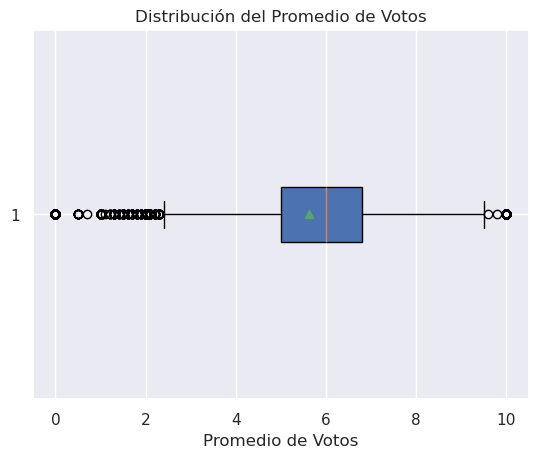

In [47]:
plt.boxplot(movies['vote_average'], showmeans=True, vert=False, patch_artist=True)
plt.title('Distribución del Promedio de Votos')
plt.xlabel('Promedio de Votos')
plt.yticks(ticks=None)
plt.show()

Se continua con una distribución del total de votos para conocer en general cuántos votos reciben las películas y comprender si es una medida que pueda ser importante. Puede verse que hay una gran cantidad de valores que son outliers. Por tanto se define desde qué valores se pueden considerar outliers estadísticamente y se rehace el gráfico desde ahí.

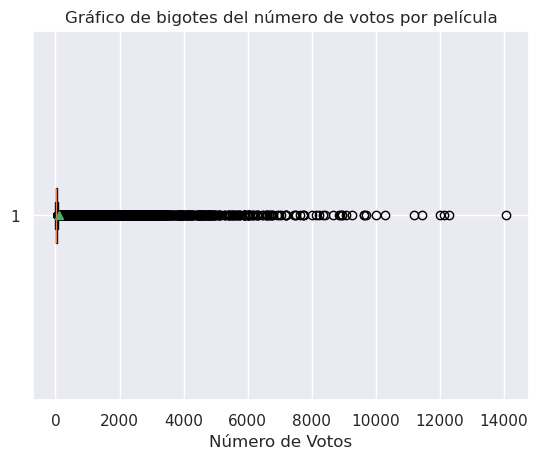

In [45]:
plt.boxplot(movies['vote_count'],showmeans=True, vert=False, patch_artist=True)
plt.title('Gráfico de bigotes del número de votos por película')
plt.xlabel('Número de Votos')
plt.show()

In [53]:
# determinar los outliers usando el IQR
q1 = movies['vote_count'].quantile(0.25)
q3 = movies['vote_count'].quantile(0.75) 
iqr = q3 - q1

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
print(f'Límite inferior: {lower_limit}\nLímite superior: {upper_limit}')

Límite inferior: -43.5
Límite superior: 80.5


Con el IQR y los límites inferiores y superiores, se recrea el gráfico de bigotes y se genera además un histograma. Así puede verse que realmente la gran mayoría de películas tienen a lo sumo 80 votos, por loa que realmente no parece ser una medida muy confiable decir que el promedio de votos sea algo significativo.

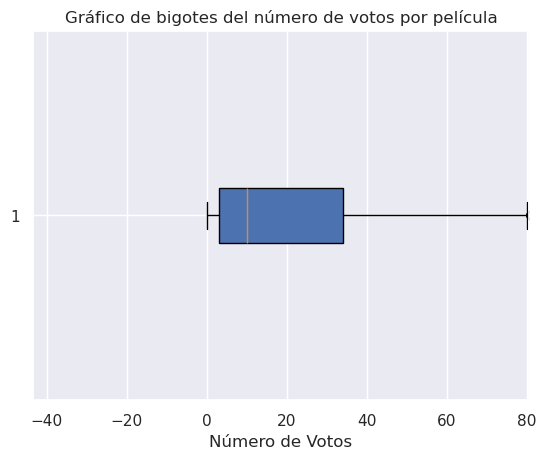

In [52]:
plt.boxplot(movies['vote_count'], showmeans=True, vert=False, patch_artist=True)
plt.title('Gráfico de bigotes del número de votos por película')
plt.xlim(lower_limit, upper_limit)
plt.xlabel('Número de Votos')
plt.show()

# 2. Idioma Predominante

Algo que debe considerarse también es qué idioma es el más hablado en las películas, pues nos dará una idea de qué país o países son los que dominan el mundo del cine. Debido a la variedad de idiomas en el mundo, se elegirán sólo los 10 idiomás más hablados en las películas. Se usará un histograma

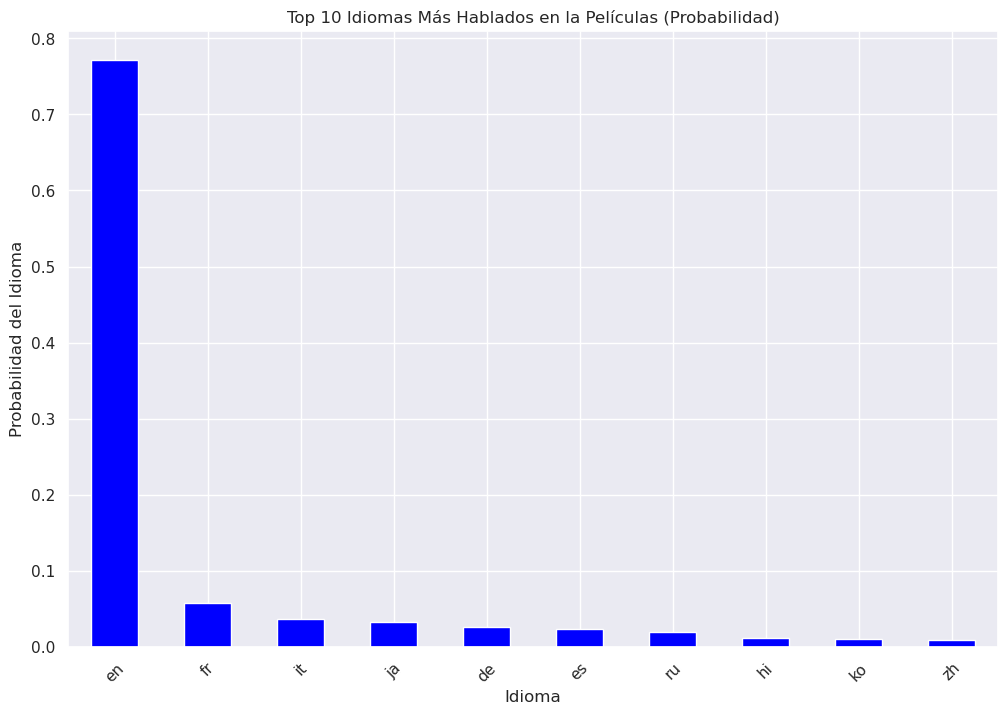

In [103]:
movies_languages = movies['original_language'].dropna()

# cuenta el total de veces que un idioma aparece
language_counts = movies_languages.value_counts()

# toma los top 10 idiomas
top_10_languages = language_counts.head(10)

# se normaliza usando la probabilidad de que aparezca cada idioma
top_10_probabilities = top_10_languages / top_10_languages.sum()

plt.figure(figsize=(12, 8))
top_10_probabilities.plot(kind='bar', color='blue')
plt.title('Top 10 Idiomas Más Hablados en la Películas (Probabilidad)')
plt.xlabel('Idioma')
plt.ylabel('Probabilidad del Idioma')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Cada idioma corresponse a los siguientes:


In [68]:
movies_languages = movies['language'].dropna()
language_counts = movies_languages.value_counts()
top_10_languages = language_counts.head(10)
top_10_languages

language
English     26816
Français     2425
Italiano     1410
日本語          1388
Deutsch      1299
Español      1143
Pусский       905
हिन्दी        546
한국어/조선말       446
普通话           413
Name: count, dtype: int64

Puede verse claramente que el Inglés es el idioma de facto del mundo cinematográfico, puede ser por el alto presupuesto que se destina en el mundo anglosajón a la creación de películas o simplemente al haber sido Estados Unidos una de las primeras grandes potencias en popularizar el cine hizo que sus películas sean mucho más consumidas.

# 3. Revenue Promedio y Por Idioma

Aquí se busca explorar cuál es el retorno o revenue promedio de las películas, así como listas el revenue total según los 10 idiomas con más películas

In [82]:
languages = movies['original_language'].value_counts().head(10)
revenue_language = movies[movies['original_language'].isin(languages.index)]
revenue['original_language'].unique()

array(['en', 'fr', 'zh', 'it', 'de', 'es', 'ru', 'ja', 'ko', 'hi'],
      dtype=object)

In [97]:
total_revenue_per_language = revenue.groupby('original_language')['revenue'].sum()
total_revenue_per_language.sort_values(ascending=True,inplace=True)

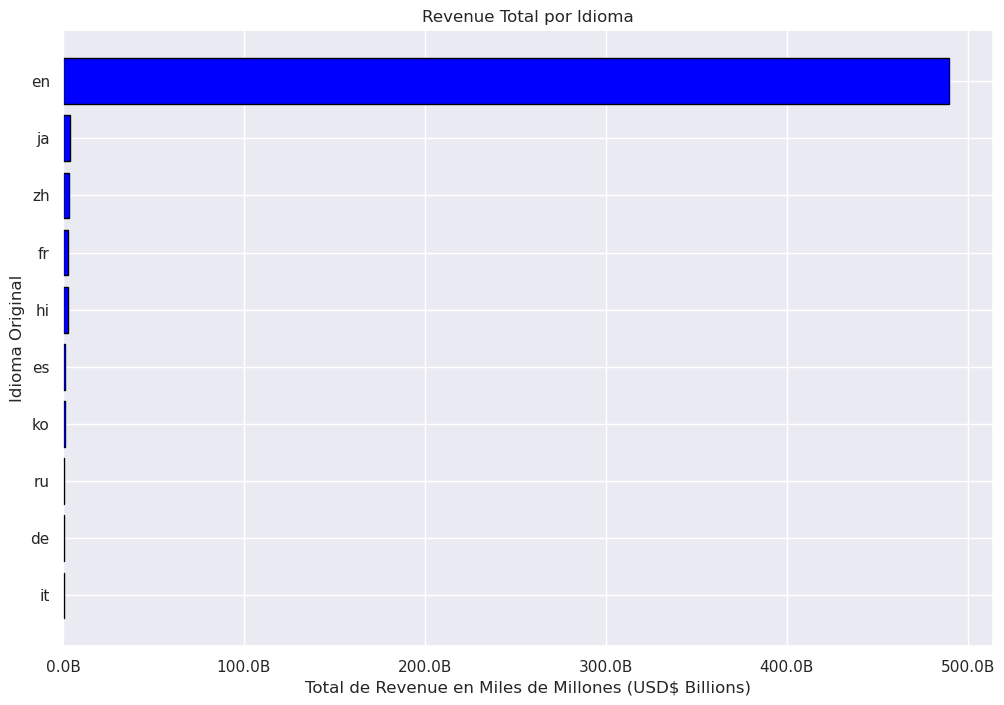

In [104]:
# funcion par convertir a billones
def billions(x, pos):
    return '%1.1fB' % (x * 1e-9)

formatter = FuncFormatter(billions)

plt.figure(figsize=(12, 8))
plt.barh(y=total_revenue_per_language.index, width=total_revenue_per_language.values, color='blue', edgecolor='black')
plt.title('Revenue Total por Idioma')
plt.xlabel('Total de Revenue en Miles de Millones (USD$ Billions)')
plt.ylabel('Idioma Original')
plt.grid(True)
# Aplica el formatter
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

In [192]:
total_revenue_per_language

original_language
it    6.920633e+08
de    7.621971e+08
ru    8.138099e+08
ko    9.686435e+08
es    1.079643e+09
hi    2.671225e+09
fr    2.687990e+09
zh    3.344863e+09
ja    3.689456e+09
en    4.895519e+11
Name: revenue, dtype: float64

De lo anterior se puede ver que no solamente las películas de habla inglesas son las más abundantes, sino que arrasan en cuanto a revenue total a las películas de los demás idiomas. Esto plantea una cuestión interesante, pues podría decirse que las películas no se adaptan a los gustos de otras culturas, sino más bien que otras culturas se deben adaptar a los gustos de los países de habla inglesa.

Se puede visualizar el revenue promedio de todas las películas con el siguiente gráfico de bigotes (boxplot). Aquí se tienen en cuenta todos los idiomas.

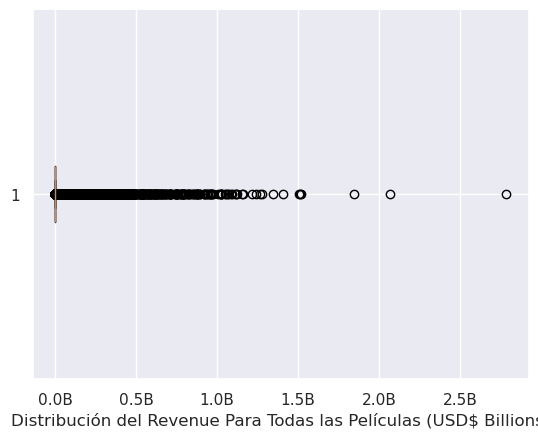

In [113]:
plt.boxplot(movies['revenue'], vert=False)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xlabel('Distribución del Revenue Para Todas las Películas (USD$ Billions)')
plt.show()

Se aprecia la enorme cantidad de outliers, por lo que se calcula nuevamente los límites superior e inferior usando el IQR

In [138]:
# the IQR was not working because there were some movies with 0 as revenue
revenue = movies['revenue'].replace(0, np.nan).dropna()

In [142]:
q1 = revenue.quantile(0.25)
q3 = revenue.quantile(0.75)

In [147]:
iqr = q3 - q1
iqr
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
print(f'Límite inferior: {lower_limit}\nLímite superior: {upper_limit}')

Límite inferior: -94961295.75
Límite superior: 164671846.25


In [154]:
revenue.median()

16846198.5

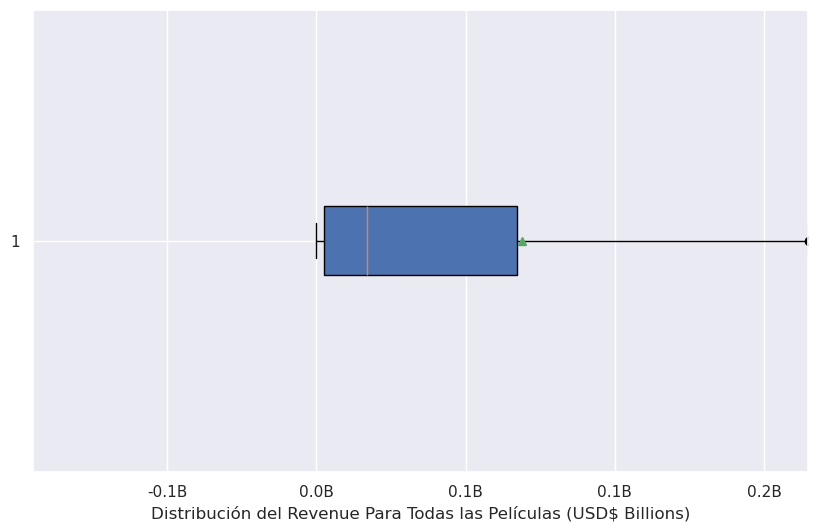

In [155]:
plt.figure(figsize=(10,6))
plt.boxplot(revenue, vert=False, showmeans=True, patch_artist=True)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xlabel('Distribución del Revenue Para Todas las Películas (USD$ Billions)')
plt.xlim(lower_limit,upper_limit)
plt.show()

Se puede ver que en general, caso todas generan menos de `$164.7 millones de dólares` usando el IQR, siendo la mediana `USD$16,846,198` y el límite superior del gráfico `USD$164,671,846`. Por lo que sí puede decir que en términos de las ganancias, al menos los países de habla inglesa al producir más películas se llevan gran parte de todo el retorno global del mercado cinematográfico.

# 4. Qué Palabras Se Repiten Más En Los Títulos De Películas

Para esto se usará la librería WordCloud, que es una librería de Python para crear gráficos de nube de palabras. Así se podrá ver si hay palabras que se repiten más en los títulos de películas y entender mejor cuál parece ser la tendencia al nombrar películas.
Para esto se importa además STOPWORDS, que es una lista de palabras que no aportan información al análisis, por ejemplo artículos, números, etc.


In [179]:
titles = movies['title']
genres = movies['genre_name']
titles_text = ' '.join(titles.values.tolist())

# se crea primero la nube para los titulos
stopwords = set(STOPWORDS)
word_cloud_titles = WordCloud(stopwords=stopwords, max_words=100, background_color="white", width=800, height=400).generate(titles_text)


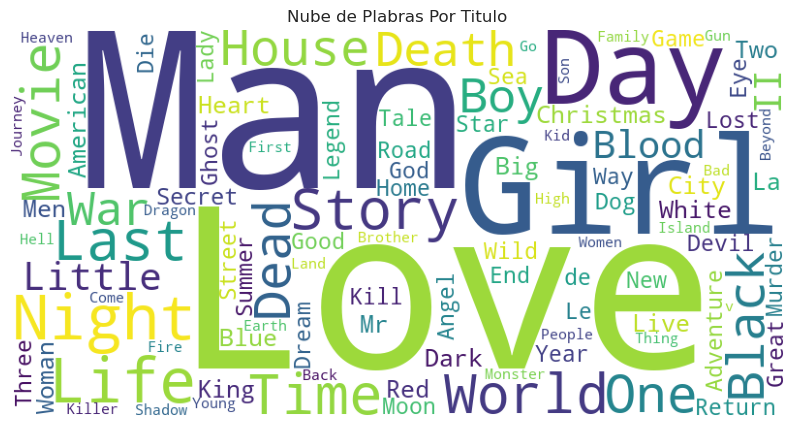

In [188]:
# Esta corresponde a la nube de palabras para los titulos

plt.figure(figsize=(10,10))
plt.imshow(word_cloud_titles)
plt.axis('off')
plt.title('Nube de Plabras Por Titulo')
plt.show()

# 5. Cuál Es El Género Predominante Entre las Películas

Al igual que con el punto anterior, se usará la librería WordCount para entender el género que predomina.

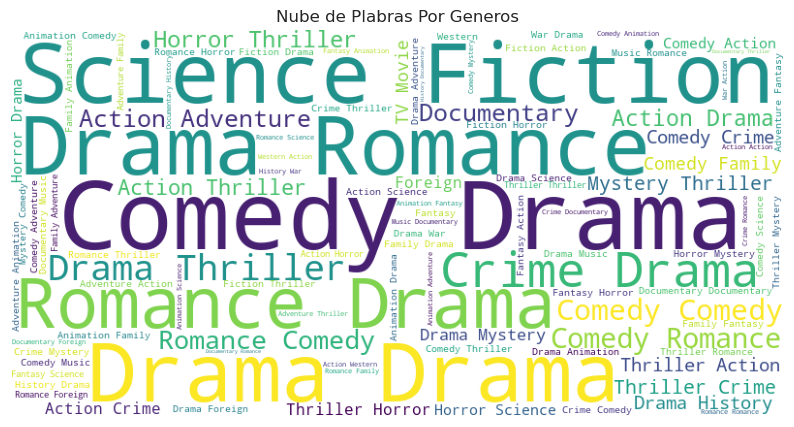

In [187]:
# Esta corresponde a la nube de palabras para los generos, la cual debe desanidarse primero
genres_text = genres.apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
genres_text_unnested = []
for key in genres_text:
  genres_text_unnested.append(' '.join(key))
genres_text_string = ' '.join(genres_text_unnested)

word_cloud_genres = WordCloud(stopwords=stopwords, max_words=100, background_color="white", width=800, height=400).generate(genres_text_string)

plt.figure(figsize=(10,10))
plt.imshow(word_cloud_genres)
plt.axis('off')
plt.title('Nube de Plabras Por Generos')
plt.show()

## Conclusión respecto a los datos
Se pudo ver que en realidad la gran mayoría de películas tienen un revenue modesto, siendo la mediana `USD$16,846,198` y el idioma predominante en el mundo del cine el Inglés, generando casi que USD$500 mil millones (Billions en inglés) con todas las películas del dataset, siendo así los demás idiomas prácticamente insignificantes, lo que indicaría que si se desea producir una nueva película, sería seguro apostar por hacerla en inglés, pues es el mercado que más consume este contenido.

También se pudo ver que la gran mayoría de películas están entre un 5 y un 6.8 de puntuación, por lo que parece ser que al menos las produtoras en general saben elegir las películas a producir, pues significa que la gran mayoría están conformes con las películas que han visto. Sin embargo, como lo muestra el gráfico del total de votos por película, estos son a lo sumo 80 votos por película, lo cual no da mucha certeza que la gente esté algo conforme con las películas que ve. Simplemente se puede concluir que la gran mayoría que ve una película nunca la calificará.

Puede verse además que en los títulos predominan las palabras:

- Love
- Man
- Girl
- Day
- Night
- World
- Last
- Death
- Life
- Time

Mientras que en los géneros las palabras predominantes son:

- Drama
- Romance
- Comedy
- Science Fiction
- Crime
- Thriller

De lo anterior sorprende que el género de acción y superhéroes que tanto ha abundado estos últimos años no aparezca. Puede ser debido a la fecha del dataset o simplemente aunque son películas taquilleras, realmente son tan pocas en comparación con las demás producciones que no han sido relevantes al crear la nube de palabras.

Lo que sí se puede apreciar es que extrapolando las palabras, las personas parecen interesarse más por películas de drama, romance y comedia donde al parecer las historias traten sobre el mundo, la vida, la muerta y cuyos personajes son bien distribuidos entre hombres y mujeres.